<h1><font color="blue">데이터 로딩과 저장</font></h1>

<h2><font color="red">파일 읽기/쓰기</font></h2>

<h4><font color="green">데이터 저장하기</font></h4>

<h6><font color="BlueViolet">to_csv() 함수</font></h6>

In [1]:
'''
다음과 같은 데이터를 이용하여 result02.csv 파일을 생성해 보세요.
이름,나이,주소
김철수,10,금천
박영희,20,용산
'''

'\n다음과 같은 데이터를 이용하여 result02.csv 파일을 생성해 보세요.\n이름,나이,주소\n김철수,10,금천\n박영희,20,용산\n'

In [2]:
import random
import pandas as pd

In [3]:
result01=[]
columns01 = ('이름', '나이', '주소')
myencoding = 'CP949'

In [4]:
sublist = []
sublist.append('김철수')
sublist.append(10)
sublist.append('금천')
result01.append(sublist)

In [5]:
sublist = []
sublist.append('박영희')
sublist.append(20)
sublist.append('용산')
result01.append(sublist)

In [6]:
myframe01 = pd.DataFrame(result01, columns=columns01)
myframe01

,이름,나이,주소
0,김철수,10,금천
1,박영희,20,용산


In [7]:
filename = './../data/result02.csv'
myframe01.to_csv(filename, encoding=myencoding, mode='w', index=True)
print(filename + ' 파일이 저장되었습니다.')

./../data/result02.csv 파일이 저장되었습니다.


In [8]:
result = pd.read_csv('./../data/result02.csv', index_col=0, encoding='cp949')
result

,이름,나이,주소
0,김철수,10,금천
1,박영희,20,용산


<h2><font color="red">문제를 풀어 보세요.</font></h2>

In [9]:
'''
'분기' 컬럼은 'quarter'으로, '출고량' 컬럼은 'output'으로 이름을 변경해 보세요.
"일생산량"에 대한 총합과 평균과 표준 편차를 확인해 보세요.

다음과 같이 신규 컬럼을 추가해 보세요.
    남은량 = 총생산량 - 출고량
    불량률 = 불량품/일생산량

제품명이 '미니오븐'인 행을 삭제하세요.
'불량품', '출고량' 컬럼을 삭제하세요.

'믹서기'만 추출하여 "일생산량" 컬럼에 대한 Pie 그래프를 그려 보세요.
'''

'\n\'분기\' 컬럼은 \'quarter\'으로, \'출고량\' 컬럼은 \'output\'으로 이름을 변경해 보세요.\n"일생산량"에 대한 총합과 평균과 표준 편차를 확인해 보세요.\n\n다음과 같이 신규 컬럼을 추가해 보세요.\n    남은량 = 총생산량 - 출고량\n    불량률 = 불량품/일생산량\n\n제품명이 \'미니오븐\'인 행을 삭제하세요.\n\'불량품\', \'출고량\' 컬럼을 삭제하세요.\n\n\'믹서기\'만 추출하여 "일생산량" 컬럼에 대한 Pie 그래프를 그려 보세요.\n'

In [10]:
homeware = pd.read_csv('./../data/가전제품.csv', encoding='cp949')
homeware.head()

,제품명,분기,일생산량,생산일수,총생산량,불량품,출고량
0,미니오븐,1,85,20,6000,24,50
1,전기밥솥,1,85,25,9000,36,80
2,믹서기,1,90,25,12000,48,80
3,전자레인지,1,85,25,7200,29,50
4,미니냉장고,1,65,25,4800,19,65


In [11]:
renamed_col = {'분기':'quarter', '출고량':'output'}
homeware = homeware.rename(columns=renamed_col)
homeware.head()

,제품명,quarter,일생산량,생산일수,총생산량,불량품,output
0,미니오븐,1,85,20,6000,24,50
1,전기밥솥,1,85,25,9000,36,80
2,믹서기,1,90,25,12000,48,80
3,전자레인지,1,85,25,7200,29,50
4,미니냉장고,1,65,25,4800,19,65


In [12]:
dayproduct = homeware['일생산량']
dayproduct.head()

0    85
1    85
2    90
3    85
4    65
Name: 일생산량, dtype: int64

In [13]:
print('dayproduct.sum() : ' + str(dayproduct.sum()))
print('dayproduct.mean() : ' + str(dayproduct.mean()))
print('dayproduct.std() : ' + str(dayproduct.std()))

dayproduct.sum() : 1990
dayproduct.mean() : 82.91666666666667
dayproduct.std() : 9.881544795032399


In [14]:
homeware['남은량'] = homeware['총생산량'] - homeware['output']
homeware['불량률'] = homeware['불량품']/homeware['일생산량']
homeware.head()

,제품명,quarter,일생산량,생산일수,총생산량,불량품,output,남은량,불량률
0,미니오븐,1,85,20,6000,24,50,5950,0.282353
1,전기밥솥,1,85,25,9000,36,80,8920,0.423529
2,믹서기,1,90,25,12000,48,80,11920,0.533333
3,전자레인지,1,85,25,7200,29,50,7150,0.341176
4,미니냉장고,1,65,25,4800,19,65,4735,0.292308


In [15]:
homeware['제품명'].head()

0     미니오븐
1     전기밥솥
2      믹서기
3    전자레인지
4    미니냉장고
Name: 제품명, dtype: object

In [16]:
homeware = homeware.loc[homeware['제품명'] != '미니오븐']
homeware.head()

,제품명,quarter,일생산량,생산일수,총생산량,불량품,output,남은량,불량률
1,전기밥솥,1,85,25,9000,36,80,8920,0.423529
2,믹서기,1,90,25,12000,48,80,11920,0.533333
3,전자레인지,1,85,25,7200,29,50,7150,0.341176
4,미니냉장고,1,65,25,4800,19,65,4735,0.292308
5,선풍기,1,70,25,10800,43,55,10745,0.614286


In [17]:
homeware = homeware.drop(['불량품', 'output'], axis='columns')
homeware.head()

,제품명,quarter,일생산량,생산일수,총생산량,남은량,불량률
1,전기밥솥,1,85,25,9000,8920,0.423529
2,믹서기,1,90,25,12000,11920,0.533333
3,전자레인지,1,85,25,7200,7150,0.341176
4,미니냉장고,1,65,25,4800,4735,0.292308
5,선풍기,1,70,25,10800,10745,0.614286


In [18]:
mixer = homeware.loc[homeware['제품명'] == '믹서기', ['quarter', '일생산량']]
mixer

,quarter,일생산량
2,1,90
8,2,85
14,3,80
20,4,80


In [19]:
quarter = mixer['quarter'].to_list() 
quarter = [str(quad) + '사분기' for quad in quarter]
quarter
mixer.index = quarter 
mixer = mixer.drop('quarter', axis='columns')
mixer.name = '믹서기'

In [20]:
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
mycolors = ['AntiqueWhite', 'DarkCyan', 'Brown', 'HotPink']

Text(0.5, 1.0, '분기별 믹서기 일생산량')

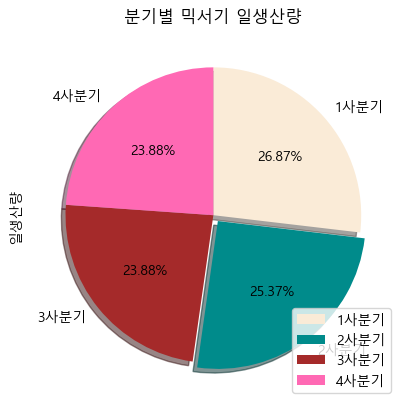

In [21]:
mylabel = mixer.index
mixer.plot(kind='pie', labels=mylabel, shadow=True, explode=(0, 0.05, 0, 0),
        colors=mycolors, autopct='%1.2f%%', startangle=90, counterclock=False, subplots=True)
plt.grid(True)
plt.legend(loc=4)
plt.xlabel(mixer.index.name)
plt.title('분기별 ' + mixer.name + ' 일생산량')